<a href="https://colab.research.google.com/github/RenukaPulavarthi/house_price_prediction/blob/main/house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#loading the data
data=pd.read_csv('housing.csv')

In [ ]:
#printing the data
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
#know about the data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
#removing the null values
data.dropna(inplace=True)

In [ ]:
#again checking the data
data.info()
data=data.join(pd.get_dummies(data.ocean_proximity)).drop(['ocean_proximity'],axis=1)
data

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,False,True,False,False,False
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,False,True,False,False,False
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,False,True,False,False,False
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,False,True,False,False,False


In [ ]:
#spliting the data into training and testing
from sklearn.model_selection import train_test_split
x=data.drop(['median_house_value'],axis=1)
y=data['median_house_value']

In [ ]:
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,False,True,False,False,False
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,False,True,False,False,False
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,False,True,False,False,False
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,False,True,False,False,False


In [ ]:
y

,median_house_value
0,452600.0
1,358500.0
2,352100.0
3,341300.0
4,342200.0
...,...
20635,78100.0
20636,77100.0
20637,92300.0
20638,84700.0


In [ ]:
#spliting the data
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=40)

In [ ]:
train_data=xtrain.join(ytrain)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

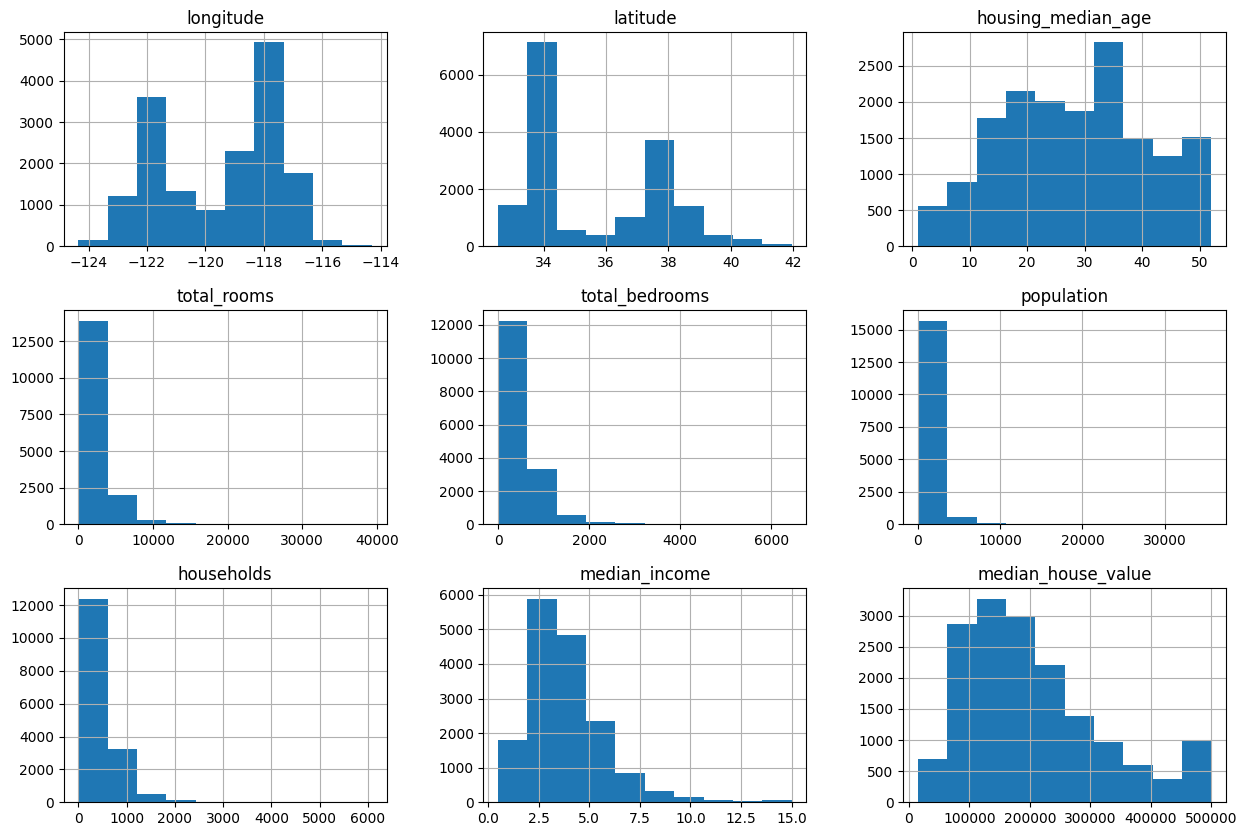

In [ ]:
#plotting
train_data.hist(figsize=(15,10))

<Axes: >

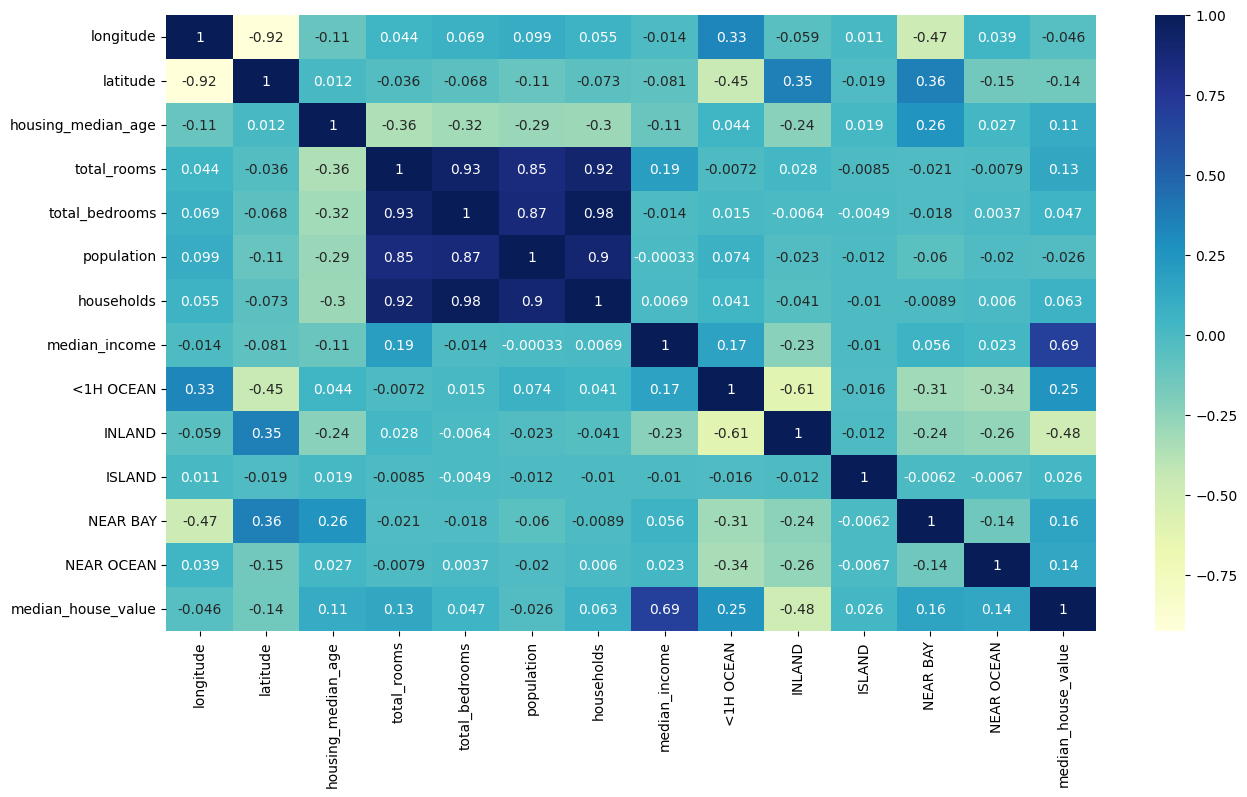

In [ ]:
#heat map
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True),annot=True,cmap='YlGnBu')


In [ ]:
#applying logirithms for standadization
train_data['total_rooms']=np.log(train_data['total_rooms']+1)
train_data['total_bedrooms']=np.log(train_data['total_bedrooms']+1)
train_data['population']=np.log(train_data['population']+1)
train_data['households']=np.log(train_data['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

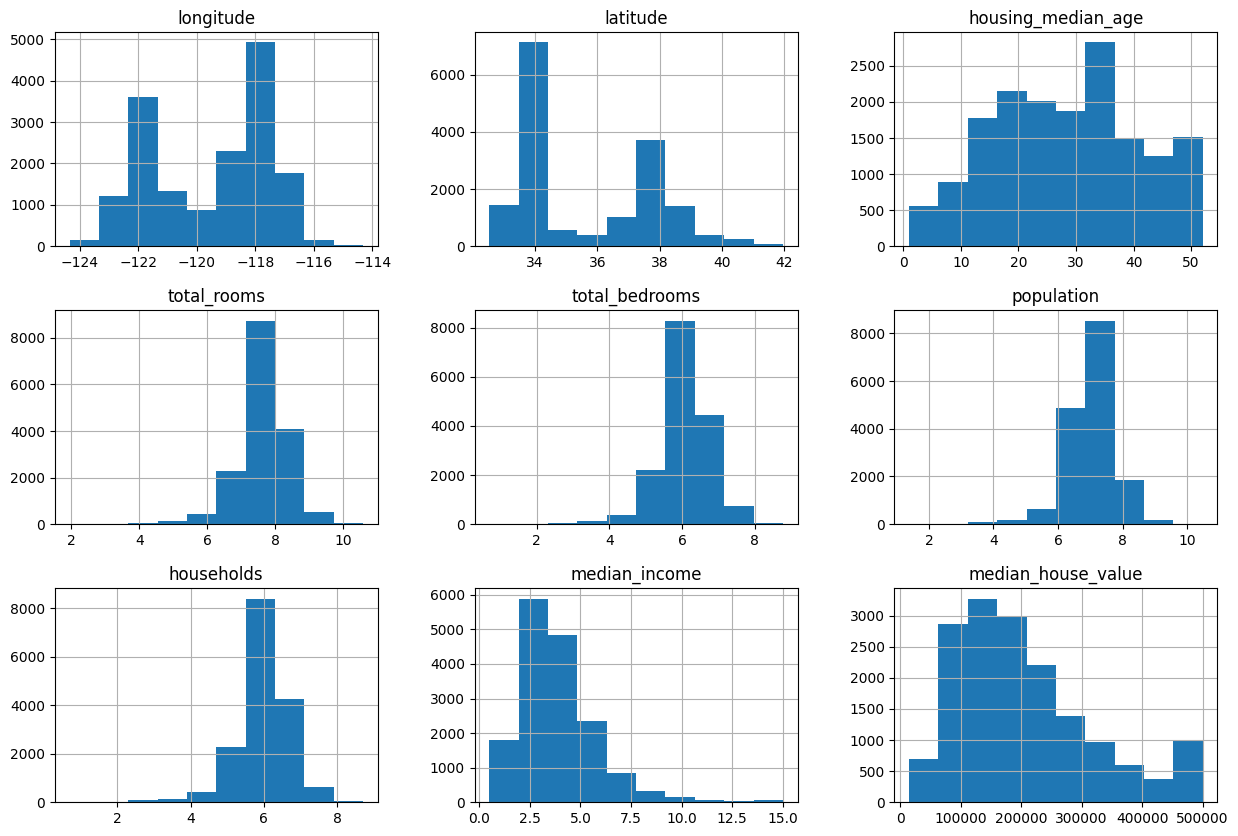

In [ ]:
#again ploting the histogram to identify the changes
train_data.hist(figsize=(15,10))

<Axes: xlabel='latitude', ylabel='longitude'>

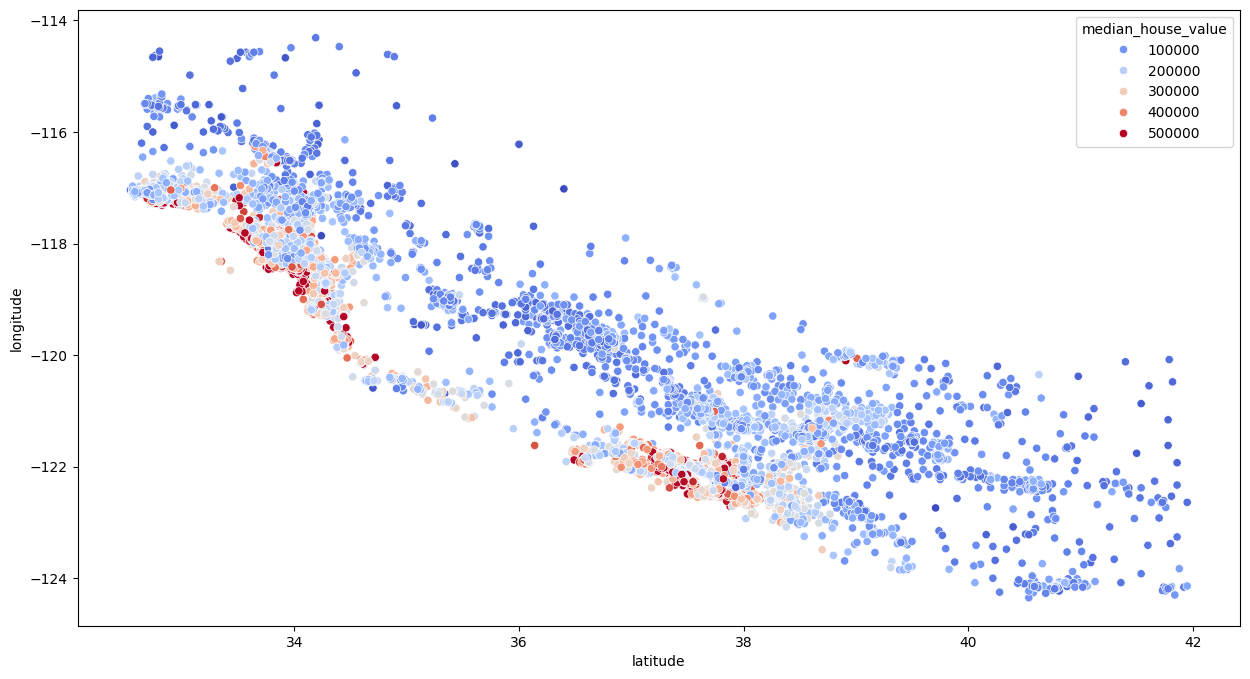

In [ ]:
#plotting scatter plot
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude',y='longitude',data=train_data,hue='median_house_value',palette='coolwarm')

In [ ]:
#adding more feature to our data for better results
train_data['bedroom_ratio']=train_data['total_bedrooms']/train_data['total_rooms']
train_data['households_rooms']=train_data['total_rooms']/train_data['households']

<Axes: >

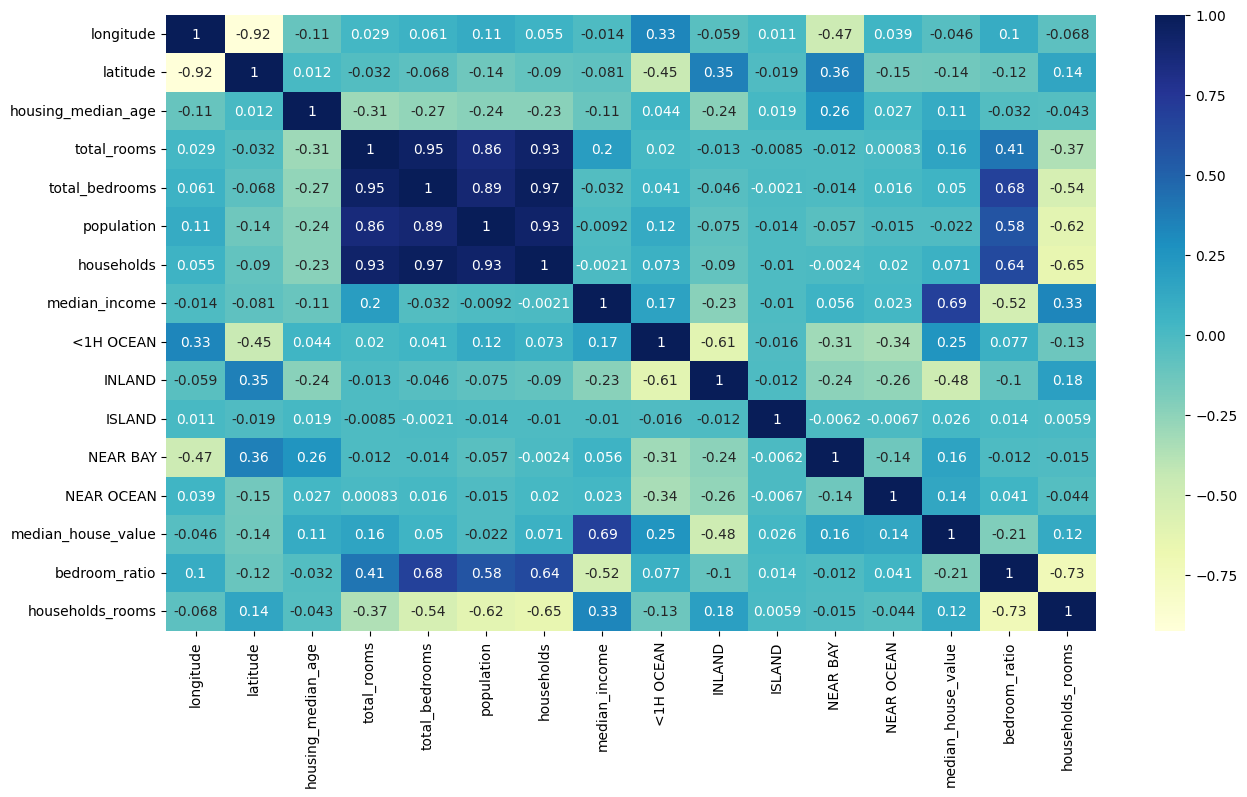

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True),annot=True,cmap='YlGnBu')


In [ ]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value,bedroom_ratio,households_rooms
15407,-117.23,33.22,18.0,7.755767,6.352629,6.870053,6.324359,1.8080,True,False,False,False,False,97000.0,0.819085,1.226333
11795,-121.39,38.85,19.0,8.180041,6.472346,7.447168,6.381816,4.0862,False,True,False,False,False,162700.0,0.791236,1.281773
12366,-116.46,33.79,10.0,8.848078,7.305188,7.030857,6.495266,2.1411,False,True,False,False,False,136400.0,0.825624,1.362235
18761,-122.23,40.63,16.0,7.040536,5.398163,6.335054,5.303305,2.3287,False,True,False,False,False,130700.0,0.766726,1.327575
1549,-121.92,37.73,24.0,7.249926,5.793014,6.218600,5.690359,2.4821,True,False,False,False,False,157200.0,0.799045,1.274072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11648,-118.03,33.86,19.0,7.493317,5.796058,6.922644,5.777652,4.5350,True,False,False,False,False,289300.0,0.773497,1.296948
16223,-121.32,37.98,37.0,8.085795,6.467699,7.460490,6.501290,3.0660,False,True,False,False,False,94100.0,0.799884,1.243722
14642,-117.20,32.79,34.0,6.630683,5.361292,6.016157,5.407172,3.2312,False,False,False,False,True,192200.0,0.808558,1.226276
14696,-117.09,32.79,36.0,7.333023,5.587249,6.527958,5.564520,4.0982,False,False,False,False,True,171200.0,0.761930,1.317818


In [ ]:
#standadizing the dta using standardScalar
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scalar=StandardScaler()

xtrain,ytrain=train_data.drop(['median_house_value'],axis=1),train_data['median_house_value']
xtrain=scalar.fit_transform(xtrain)

reg=LinearRegression()
reg.fit(xtrain,ytrain)

LinearRegression()

In [ ]:
#applying logorithm
test_data=xtest.join(ytest)

test_data['total_rooms']=np.log(test_data['total_rooms']+1)
test_data['total_bedrooms']=np.log(test_data['total_bedrooms']+1)
test_data['population']=np.log(test_data['population']+1)
test_data['households']=np.log(test_data['households']+1)


test_data['bedroom_ratio']=test_data['total_bedrooms']/test_data['total_rooms']
test_data['households_rooms']=test_data['total_rooms']/test_data['households']

xtest,ytest=test_data.drop(['median_house_value'],axis=1),test_data['median_house_value']

In [ ]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value,bedroom_ratio,households_rooms
20230,-119.29,34.26,32.0,8.100465,6.639876,7.204149,6.398595,3.6007,False,False,False,False,True,395500.0,0.819691,1.265976
16928,-122.32,37.57,42.0,7.853605,6.421622,7.774015,6.378426,3.2891,False,False,False,False,True,237900.0,0.817666,1.231276
11644,-118.04,33.81,22.0,8.308446,6.437752,7.698483,6.467699,5.8527,True,False,False,False,False,241000.0,0.774844,1.284606
2670,-115.60,33.20,37.0,6.565265,5.236442,5.968708,4.962845,2.4511,False,True,False,False,False,72500.0,0.797598,1.322883
15578,-116.90,33.03,11.0,8.075272,6.453625,7.588830,6.363028,3.4750,True,False,False,False,False,167200.0,0.799184,1.269093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,-121.84,39.73,52.0,6.519147,5.030438,5.940171,5.043425,1.6797,False,True,False,False,False,94800.0,0.771640,1.292603
5897,-118.32,34.16,46.0,7.760467,6.118097,6.939254,6.059123,4.3173,True,False,False,False,False,278300.0,0.788367,1.280790
12089,-117.33,33.87,14.0,7.741099,5.817111,6.909753,5.743003,5.1045,False,True,False,False,False,161300.0,0.751458,1.347918
1502,-122.04,37.95,29.0,6.765039,4.934474,5.834811,4.897840,4.7188,False,False,False,True,False,197100.0,0.729408,1.381229


In [ ]:
#trying with logistic regression
x_test_s=scalar.transform(xtest)
reg.score(x_test_s,ytest)

0.6805003976637944

In [ ]:
#using random forest
from sklearn.ensemble import RandomForestRegressor

forest=RandomForestRegressor()
forest.fit(xtrain,ytrain)

RandomForestRegressor()

In [ ]:
#predicting
forest.score(x_test_s,ytest)

0.8237059860357427

In [ ]:
#testing for new cases
data=[[-118.22,33.95,36.0,7.4265,6.18,7.71,6.79,2.8,True,False,False,False,False,0.83,1.199]]
forest.predict(data)

array([415038.48])